# Cluster Analysis of Tweets
## Cluster Analysis Details
Here we are trying to uncover some underlying structure to the tweets we have collected so far. We will first try to perform a cluster analysis to the tweets to see if the tweets will group into clusters that we can exploit when trying to label data. We start by describing the problem:

We are given an input dataset $\mathbf{X} = [x_1, \dots, x_k]$, where $x_i \in \mathbb{R}^d$. We want to find a dictionary $\mathbf{D} \in \mathbb{R}^{d x n}$: $\mathbf{D} = [d_1, \dots, d_n]$ and a representation $\mathbf{R} = [r_1, ..., r_k], r_i \in \mathbb{R}^n$ s.t. both $||\mathbf{X} - \mathbf{DR}||^2_F$ is minimized and the representations $r_i$ are sparse enough. This has the optimization problem:

${argmin}_{D\in C, r_i \in \mathbb{R}^n} \sum_{i=1}^{k} ||x_i - Dr_i||^2_2 + \lambda ||r_i||_0$, where $C \equiv \{D\in \mathbb{R}^{d x n}: ||d_i||_2 \leq 1, \forall i \in 1, \dots, n\}, \lambda >0$

$C$ is required to constrain $\mathbf{D}$ so that its atoms would not reach arbitrarily high values allowing for arbitrarily low (but non-zero) values of $r_{i}$. $\lambda$  controls the trade off between the sparsity and the minimization error. We usually use the $\ell_1$ instead of the $\ell_0$ norm instead in order to maintain convexity of the problem. In this case, we are dealing with an __overcomplete dictionary__ since the dimension of the representations of the strings $n$ is larger than the input data's dimension $d$. An overcomplete dictionary which allows for sparse representation of signal can be a famous transform matrix (wavelets transform, fourier transform) or it can be formulated so that its elements are changed in such a way that it sparsely represents the given signal in a best way. Learned dictionaries are capable of giving sparser solutions as compared to predefined transform matrices.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import nltk
import glob
import string
import matplotlib.pyplot as plt
import matplotlib as mpl

nltk.download('punkt')
nltk.download('twitter_samples')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\debro\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [28]:
# NLTK tweets
from nltk.corpus import twitter_samples

tweets = twitter_samples.tokenized()
tweet_dict = []
for i in range(len(tweets)):
    for j in range(len(tweets[i])):
        tweet_dict.append(tweets[i][j])

In [29]:
# Making a list directory of all the tweets we have collected
files_0 = glob.glob('./datasets/water_tweets/gathered_water/*.csv')
water1_tweets = pd.read_csv('./datasets/water_tweets/water1.csv', encoding = 'ISO-8859-1', delimiter = ',')

# loading JSON files
from pandas.io.json import json_normalize
with open('datasets/water_tweets/gathered_water/water8.json', 'r', encoding="utf-8") as json_file:
    water_json_1 = pd.read_json('datasets/water_tweets/gathered_water/water8.json', typ='object', orient='columns')
    water_json_1 = pd.io.json.json_normalize(water_json_1)
    water_json_1 = water_json_1[['text', 'timestamp']]

with open('datasets/water_tweets/gathered_water/water9_drought.json', 'r', encoding = 'utf-8') as json_file:
    water_json_2 = pd.read_json('datasets/water_tweets/gathered_water/water9_drought.json', typ='object', orient='columns')
    water_json_2 = pd.io.json.json_normalize(water_json_2)
    water_json_2 = water_json_2[['text', 'timestamp']]

water_jsons = pd.concat([water_json_1, water_json_2])
water_jsons.columns = ['text', 'date']
water_jsons['retweet_count'] = np.nan
water_jsons['category'] = np.nan
water_jsons['tweet_id'] = np.nan
water_jsons = water_jsons[['category', 'date', 'text', 'retweet_count', 'tweet_id']]

# Loading uniformly formatted pulled tweets
water_csvs = pd.concat([pd.read_csv(f, encoding = 'ISO-8859-1', delimiter = ';') for f in files_0])
water_csvs = pd.concat([water1_tweets, water_csvs, water_jsons])
water_csvs = water_csvs[['category', 'date', 'text', 'retweet_count', 'tweet_id']]
water_csvs = water_csvs[water_csvs['text'] != 'text']
water_csvs = water_csvs[water_csvs['category'] != 'pcb']
water_csvs = water_csvs[water_csvs['category'] != 'benzene']
files_1 = glob.glob('./datasets/water_tweets/rnd_tweets/*.csv')
rnd_csvs = pd.concat([pd.read_csv(f, encoding = 'ISO-8859-1', delimiter = ';') for f in files_1])
rnd_csvs = rnd_csvs[['category', 'date', 'text', 'retweet_count', 'tweet_id']]
rnd_csvs = rnd_csvs[rnd_csvs['text'] != 'text']
all_csvs = pd.concat([water_csvs, rnd_csvs])
all_csvs['text'] =  all_csvs['text'].astype(str)
all_csvs = all_csvs.drop_duplicates(subset = ['text'], keep = 'first').reset_index()
all_csvs = all_csvs.iloc[:, 1:]
#all_csvs.columns = ['category', 'date', 'tweet', 'retweet_count', 'tweet_id']
print(len(all_csvs))

all_csvs.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



419569


,category,date,text,retweet_count,tweet_id
0,flash flood,6/25/2019 20:45,@LeslieWalden6 @MookieTheBrave @AngusMcPussPus...,0.0,1.140000e+18
1,flash flood,6/25/2019 20:28,4 PASSES to FLASH FLOOD WATER PARK in Battle C...,0.0,1.140000e+18
2,flash flood,6/25/2019 20:21,So the maintenance men at my apartment complex...,0.0,1.140000e+18
3,flash flood,6/25/2019 20:07,".@NWStulsa issued 1,530 flood/flash flood prod...",0.0,1.140000e+18
4,flash flood,6/25/2019 19:55,"They might not call it a #climatedebate, but c...",0.0,1.140000e+18


In [30]:
tweet_text = list(all_csvs.text.astype(str))

# Tokenizing the tweet words
for i in range(len(tweet_text)):
    tweet = tweet_text[i]
    tweet = tweet.translate(str.maketrans('','', string.punctuation))
    tweet = tweet.split()
    for j in range(len(tweet)):
        new_word = tweet[j]
        tweet_dict.append(new_word)
print(len(tweet_dict))

new_tweet_dict = []
for i in range(len(tweet_dict)):
    word = tweet_dict[i]
    word = word.translate(str.maketrans('', '', string.punctuation))
    word = word.lower()
    new_tweet_dict.append(word)
new_tweet_dict[786085:786110]

11092120


['the',
 'bath',
 'all',
 'taps',
 'have',
 'isolation',
 'valves',
 'except',
 'the',
 'leaky',
 'bath',
 '12',
 'httpstcouc3aoh0iwe',
 'sweatienext',
 'he',
 'did',
 'come',
 'by',
 'today',
 'amp',
 'check',
 'the',
 'ceiling',
 'no',
 'nest']

## Build a Dictionary

In [31]:
from collections import Counter

vocabulary_size = 50000

# UNK = unknown words, HST = hashtag, EMT = emoticon, URL is self-explanatory, THDL = Twitter handle
# [("<UNK>", None)] + [("<HST>", None)] + [("<EMT>", None)] + [("<URL>", None)] + [("<THDL>", None)] +
vocabulary = Counter(new_tweet_dict).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in new_tweet_dict])
print(len(vocabulary))
#print(len(data))

49999


## Algorithm Used: K-means
Using the vector representations of the tweets we have gathered, we can perform k-means clustering of the tweets we have gathered. We will perform tf-idf vectorization of the tweets to aid the clustering algorithm, which calculates how often a word appears in a tweet and then counts its inverse document frequency to standardize the count. The standard k-means in this case is carried out as follows:

Given an initial-set of *k* means $m_1^{(1)}, \dots, m_k^{(1)}$, we alternate between:

__Assignment step:__ Assign each observation to the cluster whose mean has the least squared Euclidean distance, this is intuitively the "nearest" mean. (Mathematically, this means partitioning the observations according to the Voronoi diagram generated by the means).

$S_i^{(t)} = \{x_p: ||x_p - m_i^{(t)}||^2 \leq ||x_p - m_j^{(t)}||^2, \forall j \in 1, \dots, k\}$, where each $x_p$ is assigned to one $S^{(t)}$, even it can be assigned to two or more of them.

__Update step:__ Calculate the new means (centroids) of the observations of the new clusters:

$m_i^{(t+1)} = \frac{1}{|S_i^{(t)}|}\sum_{x_j \in S_i^{(t)}} x_j$

The algorithm has converged when the assignments no longer change. The algorithm does not guarantee to find the optimum.

In [32]:
# tf-idf vectorization
all_tweets = np.array(all_csvs.text)
water_csvs = water_csvs.drop_duplicates(subset = ['text'], keep = 'first')
water_tweets = np.array(water_csvs.text)

# If we get labeled data, we would use train_test_split to test out our model
#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(water_tweets, test_size = 0.20, random_state = 42)

from sklearn.feature_extraction.text import TfidfVectorizer
# We use the vocabulary formulation from the embedding formed from the autoenconder_for_tweets.ipynb
vectorizer = TfidfVectorizer(strip_accents = 'unicode', stop_words = 'english', vocabulary = vocabulary)

# tf-idf vectorization of the training set
X_tfidf = vectorizer.fit_transform(water_tweets)
#print(vectorizer.get_feature_names())
print(X_tfidf.shape)

(99205, 49999)


In [33]:
# Clustering of water tweets
from sklearn import cluster
from sklearn import metrics

print(type(X_tfidf))
print(water_tweets[:5])
print(X_tfidf[:5])

<class 'scipy.sparse.csr.csr_matrix'>
["@LeslieWalden6 @MookieTheBrave @AngusMcPussPuss @AngelaStillwell @cat_samson @arkantart @Biscuit_Meow @duchess_meow @TobiasandJasper @goodman_carina It's cwazy!! Mom tiwed of seeing flash flood warnings fwom The Weather Channel pop up on her phone evewyday. She appweciates the warning, but she knows which aweas are pwone to flooding.ð\x9f\x98¼ð\x9f\x98¼"
 '4 PASSES to FLASH FLOOD WATER PARK in Battle Creek, MICHIGAN - 2019 season!!! $12.00 | #WaterparkTickets | https://t.co/tIumVg5T0d Grab Your Tickets https://t.co/UQNz5zZ7vC'
 'So the maintenance men at my apartment complex are leaf blowing during a flash flood warning... https://t.co/YkWkVzTvSy'
 '.@NWStulsa issued 1,530 flood/flash flood products in May 2019 alone!  Includes new warnings/advisories + all follow up statements #okwx #arwx https://t.co/3M9GfJyuez'
 'They might not call it a #climatedebate, but considering that the venue where 20 Democrats are meeting in Miami this week was once i

Fit 25 clusters
Fit 50 clusters
92029.81220365223 [48]


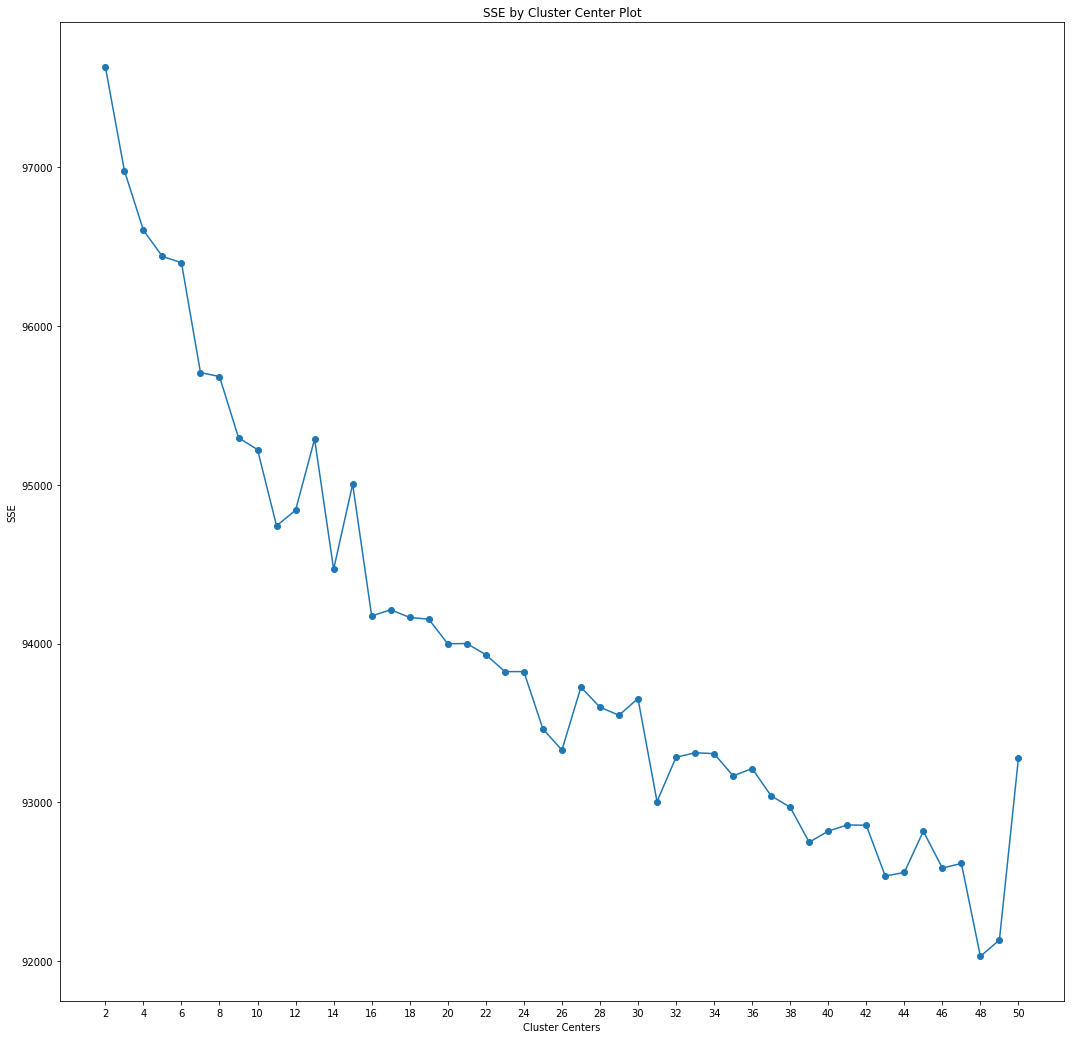

In [34]:
# Cluster analysis 
def find_optimal_clusters(data, min_k, max_k, num):
    iters = np.linspace(min_k, max_k, num = num).astype(int)
    
    sse = []
    for k in range(len(iters)):
        sse.append(cluster.MiniBatchKMeans(n_clusters = iters[k], init_size = 1024, batch_size = 2048, random_state = 42,
                                          reassignment_ratio = 0.01).fit(data).inertia_)
        if iters[k] % 25 == 0:
            print('Fit {} clusters'.format(iters[k].astype(int)))
            
    idx = np.where(sse == np.amin(sse))
    print(np.amin(sse), iters[idx])
          
    f, ax = plt.subplots(1, 1, figsize = (18, 18))
    #for n, label in enumerate(ax.xaxis.get_ticklabels()):
      #  if n % 10 != 0:
     #       label.set_visible(False)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters[np.where(iters % 2 == 0)])
    ax.set_xticklabels(iters[np.where(iters % 2 == 0)])
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_tfidf, 2, 50, 49)

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [36]:
# *Almost* the best amount of clusters given the elbow function
# evaluation shown above using mini-batch k-means
clusters = cluster.MiniBatchKMeans(n_clusters=15, init_size=1024, batch_size=2048, random_state=42).fit_predict(X_tfidf)

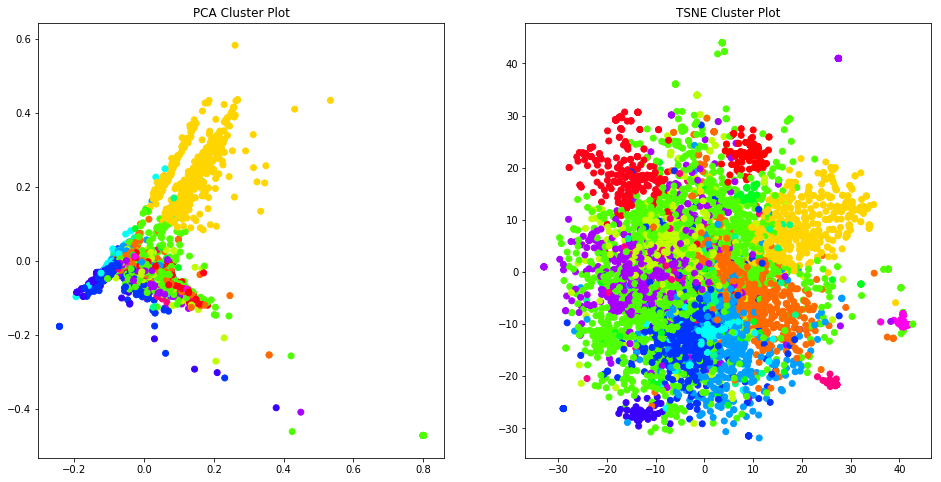

In [11]:
# Plotting the cluster analysis of gathered water tweets
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)
    
    pca = PCA(n_components=0.95).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=0.95).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=5000, replace=False)
    label_subset = labels[max_items]
    label_subset = [mpl.cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X_tfidf, clusters)

Functions are similar to the ones found from Kaggle at this link: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans/comments

In [12]:
#This code is currently in markdown as it takes up way to much memory to show these results.

# What are the most common keywords in these clusters
# Takes up too much memory
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X_tfidf, clusters, vectorizer.get_feature_names(), 15)



Cluster 0
closed,harmful,gulf,blue,largest,green,coast,erie,mississippi,beaches,https,toxic,lake,bloom,algae

Cluster 1
amp,just,years,http,thought,farmers,like,end,love,ita,year,rain,climate,https,drought

Cluster 2
july,00,nws,jul,edt,county,till,issued,cdt,pm,watch,https,warning,flash,flood

Cluster 3
better,conservation,project,sustainable,poor,resource,new,need,india,waste,resources,amp,https,water,management

Cluster 4
people,pipe,just,ecoli,plastic,coli,sewage,wastewater,bacteria,amp,contamination,waste,lead,water,https

Cluster 5
2013,nashua,know,rutherford,going,waste,just,world,people,went,https,water,spill,chemical,like

Cluster 6
flash,like,ita,extreme,humidity,summer,amp,hot,drought,drinking,wave,dry,water,https,heat

Cluster 7
really,https,eating,dona,day,dry,like,just,drought,ll,ita,water,ve,drinking,ia

Cluster 8
time,day,really,hair,amp,good,ita,skin,like,know,run,runs,just,https,dry

Cluster 9
ita,today,good,need,people,safe,eating,clean,drink,day,just,like,https,wat

__Conclusion:__

We will not consider this a wash until we are able to thread these calculations through a GPU or have access to a server with a larger memory. At this point, the clustering of these tweets do appear to have some clusters that are useful to generate "relevant" class training data.

In [37]:
print(len(clusters))

99205


In [38]:
t_c = {'text': water_tweets, 'cluster': clusters}
water_tweet_cluster = pd.DataFrame(data = t_c)
water_tweet_cluster.head(25)

,text,cluster
0,@LeslieWalden6 @MookieTheBrave @AngusMcPussPus...,8
1,4 PASSES to FLASH FLOOD WATER PARK in Battle C...,8
2,So the maintenance men at my apartment complex...,8
3,".@NWStulsa issued 1,530 flood/flash flood prod...",8
4,"They might not call it a #climatedebate, but c...",8
5,*Flash Flood Warnings*\n*Extreme weather advis...,8
6,More info: https://t.co/HtkH9Or0b3 https://t.c...,1
7,Very Dangerous Flash Flood | Natural Disaster ...,8
8,@Rnikz_ @JoahanYT he dead ass said #DareToAchi...,8
9,The 20 Democrats will meet this week in a Miam...,8


In [19]:
cluster_count = water_tweet_cluster.groupby('cluster').count().reset_index()
cluster_count = cluster_count.iloc[:, 1:]
cluster_count.columns = ['count']
cluster_count

,count
0,1
1,1852
2,13087
3,7130
4,1181
5,8021
6,5411
7,38743
8,3288
9,560


In [17]:
cluster_5 = water_tweet_cluster[water_tweet_cluster.cluster == 5]
cluster_5.head(10)

,text,cluster
0,@LeslieWalden6 @MookieTheBrave @AngusMcPussPus...,5
1,4 PASSES to FLASH FLOOD WATER PARK in Battle C...,5
2,So the maintenance men at my apartment complex...,5
3,".@NWStulsa issued 1,530 flood/flash flood prod...",5
4,"They might not call it a #climatedebate, but c...",5
5,*Flash Flood Warnings*\n*Extreme weather advis...,5
7,Very Dangerous Flash Flood | Natural Disaster ...,5
8,@Rnikz_ @JoahanYT he dead ass said #DareToAchi...,5
10,Our #SummerSavingsGiveaway continues! Starting...,5
11,Please keep us in your prayers as we will be r...,5


In [21]:
dict_of_clusters = {k: v for k, v in water_tweet_cluster.groupby('cluster')}    

import pprint
pprint.pprint(dict_of_clusters)

{0:                                                     text  cluster
70781  What I would like to see the *@NDP do for Cana...        0,
 1:                                                     text  cluster
21     @aramoons Okay same lmao but even with this ra...        1
135    @KLey79 @reallyviktoria @DeanObeidallah @realD...        1
146    @_LOVEmel8r @Mo_Towns ðððð itâs ...        1
322    @politicolucy @meggggmarie Itâs a contaminat...        1
339    @meggggmarie Well thatâs dumb. You are actua...        1
406    Itâs the #FirstDayofSummer and everyone need...        1
475    i think the saddest thing is knowing so many p...        1
557    @LordMinion777 Itâs going to sound really st...        1
569    Guess who has a third pipe leak in the SAME. E...        1
586    @City_Ekurhuleni itâs been 24hrs without wat...        1
607    @muirtwit See that the re seed field James! It...        1
617    What a beautiful day, itâs very hot and dry ...        1
6

Cluster 0: NO

Cluster 1: NO

Cluster 2: NO

Cluster 3: NO

Cluster 4: ?

Cluster 5: YES

Cluster 6: YES

Cluster 7: YES

Cluster 8: ?

Cluster 9: ?

Cluster 10: YES

Cluster 11: NO

Cluster 12: NO

Cluster 13: ?

Cluster 14: NO

## Sub-cluster Analysis Used to Generate Relevant Data

In [39]:
cluster_4 = pd.DataFrame(data = dict_of_clusters[4])
cluster_5 = pd.DataFrame(data = dict_of_clusters[5])
cluster_6 = pd.DataFrame(data = dict_of_clusters[6])
cluster_7 = pd.DataFrame(data = dict_of_clusters[7])
cluster_8 = pd.DataFrame(data = dict_of_clusters[8])
cluster_9 = pd.DataFrame(data = dict_of_clusters[9])
cluster_10 = pd.DataFrame(data = dict_of_clusters[10])
cluster_13 = pd.DataFrame(data = dict_of_clusters[13])
cluster_13.head()

,text,cluster
1167,@soodsaab08 @capbunnykiller @NetflixIndia Wate...,13
1523,Hereâs your regular plug to read âThe Swam...,13
1599,Two service providers in the #ACT rescuing foo...,13
1600,Yeah fun fact: This is the imbecile who - as G...,13
1601,OH SEHUN THANK YOU FOR SAVING THIS DROUGHT,13


In [41]:
cluster_4_tfidf = vectorizer.fit_transform(np.array(cluster_4.text))
cluster_5_tfidf = vectorizer.fit_transform(np.array(cluster_5.text))
cluster_6_tfidf = vectorizer.fit_transform(np.array(cluster_6.text))
cluster_7_tfidf = vectorizer.fit_transform(np.array(cluster_7.text))
cluster_8_tfidf = vectorizer.fit_transform(np.array(cluster_8.text))
cluster_9_tfidf = vectorizer.fit_transform(np.array(cluster_9.text))
cluster_10_tfidf = vectorizer.fit_transform(np.array(cluster_10.text))
cluster_13_tfidf = vectorizer.fit_transform(np.array(cluster_13.text))

Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
242.25573254507023 [20]


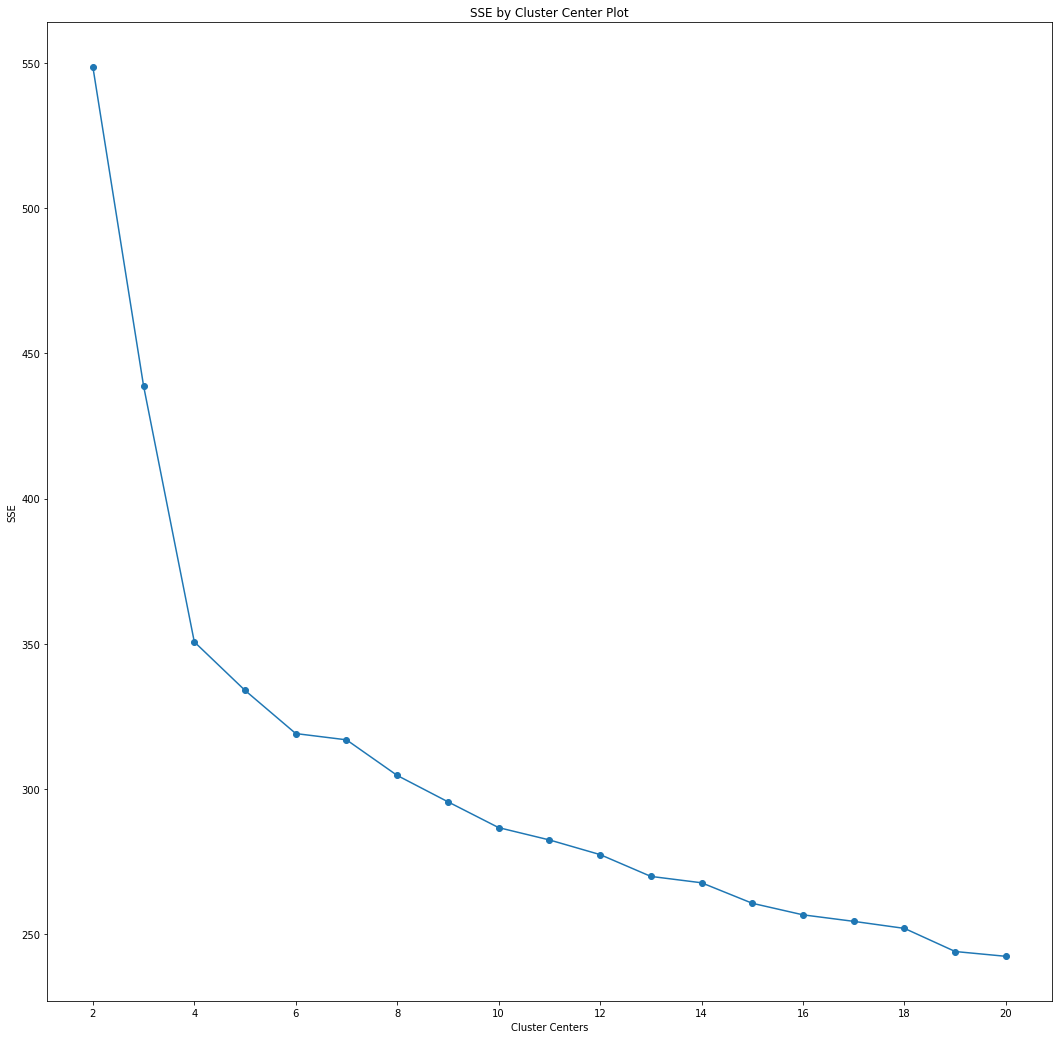

In [43]:
# Cluster analysis 
def find_optimal_clusters_kmeans(data, min_k, max_k, num):
    iters = np.linspace(min_k, max_k, num = num).astype(int)
    
    sse = []
    for k in range(len(iters)):
        sse.append(cluster.KMeans(n_clusters = iters[k], n_init = 25, random_state = 42, max_iter = 500).fit(data).inertia_)
        if iters[k] % 5 == 0:
            print('Fit {} clusters'.format(iters[k].astype(int)))
            
    idx = np.where(sse == np.amin(sse))
    print(np.amin(sse), iters[idx])
          
    f, ax = plt.subplots(1, 1, figsize = (18, 18))
    #for n, label in enumerate(ax.xaxis.get_ticklabels()):
      #  if n % 10 != 0:
     #       label.set_visible(False)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters[np.where(iters % 2 == 0)])
    ax.set_xticklabels(iters[np.where(iters % 2 == 0)])
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters_kmeans(cluster_4_tfidf, 2, 20, 19)

Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
4400.621817190622 [20]


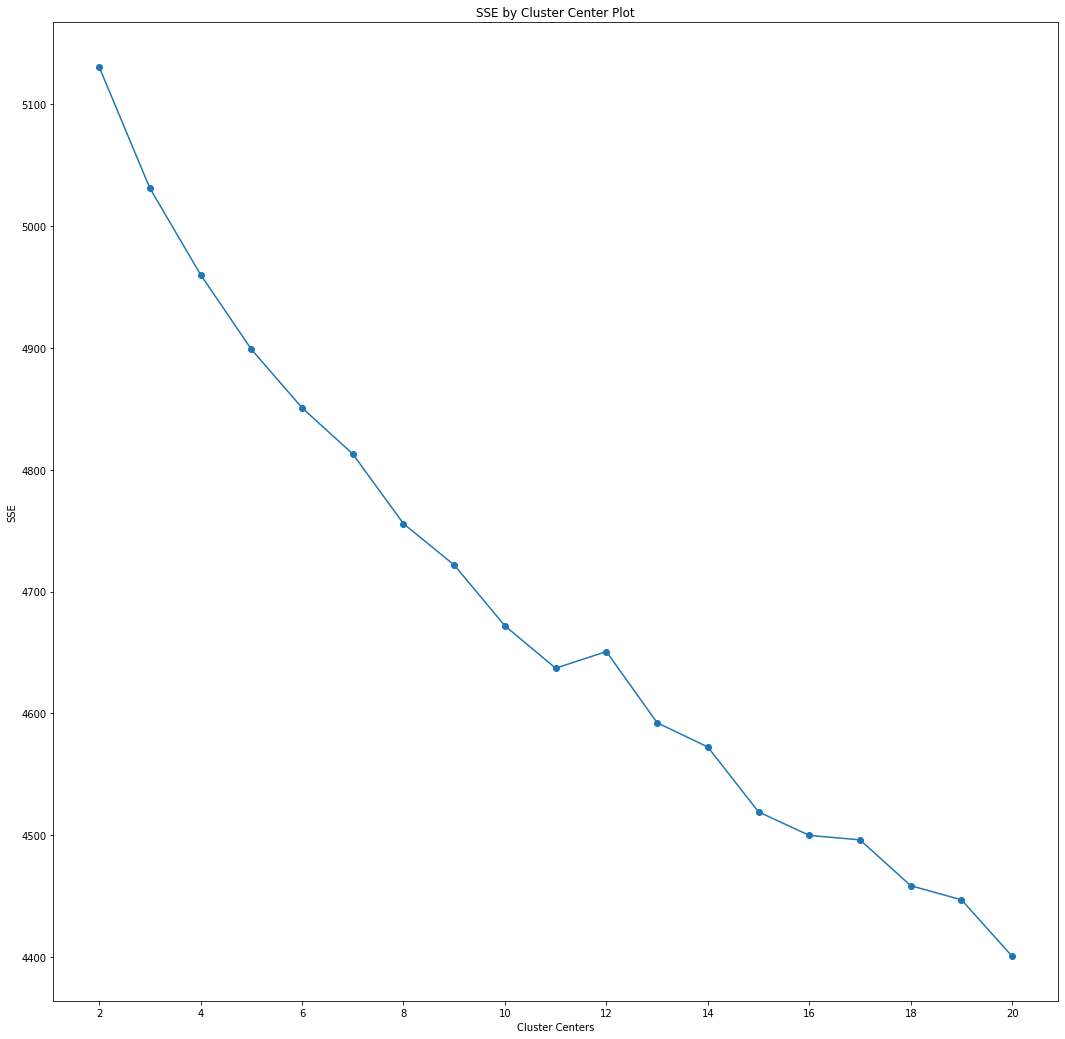

In [45]:
find_optimal_clusters_kmeans(cluster_6_tfidf, 2, 20, 19)

Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
36930.74773603208 [20]


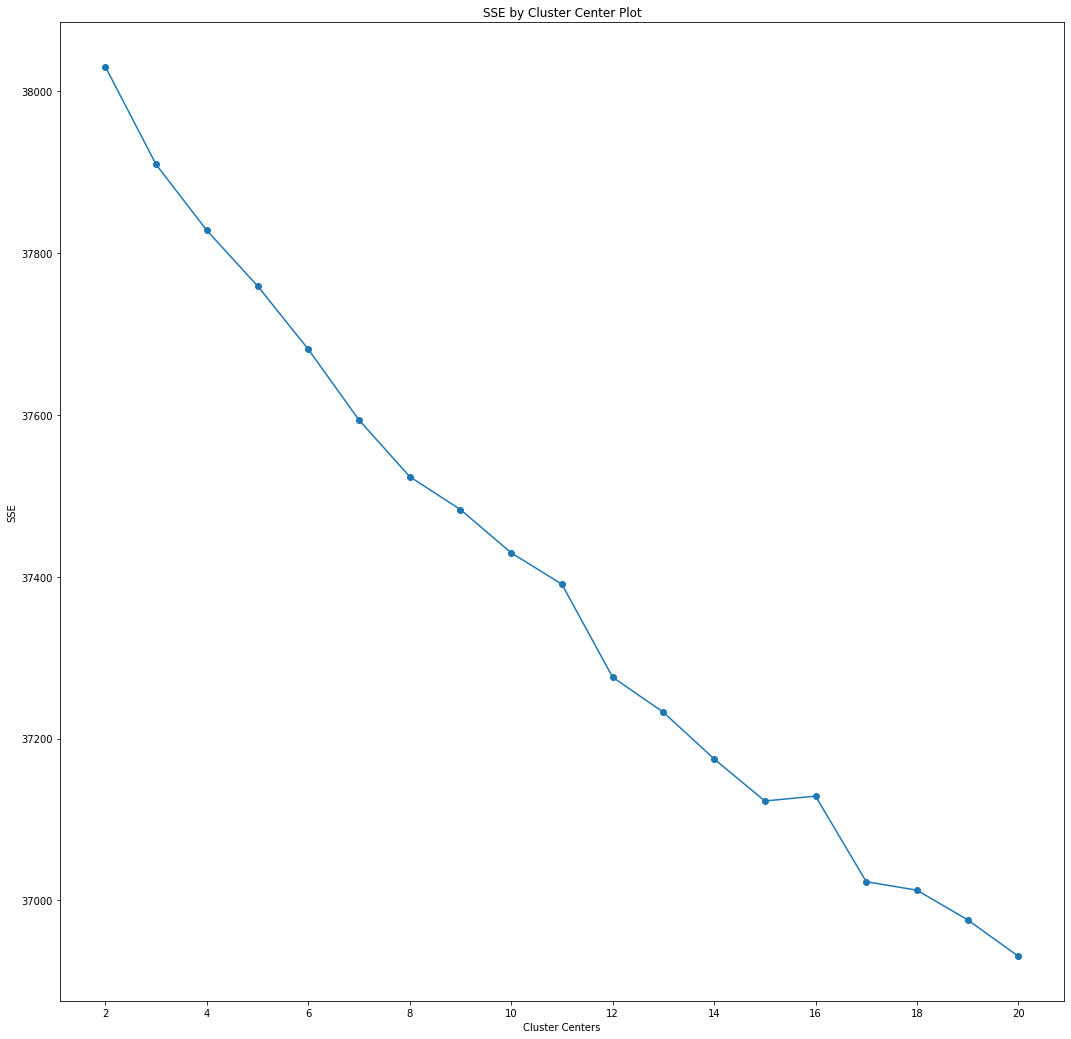

In [46]:
find_optimal_clusters_kmeans(cluster_7_tfidf, 2, 20, 19)

Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
2589.617220498784 [20]


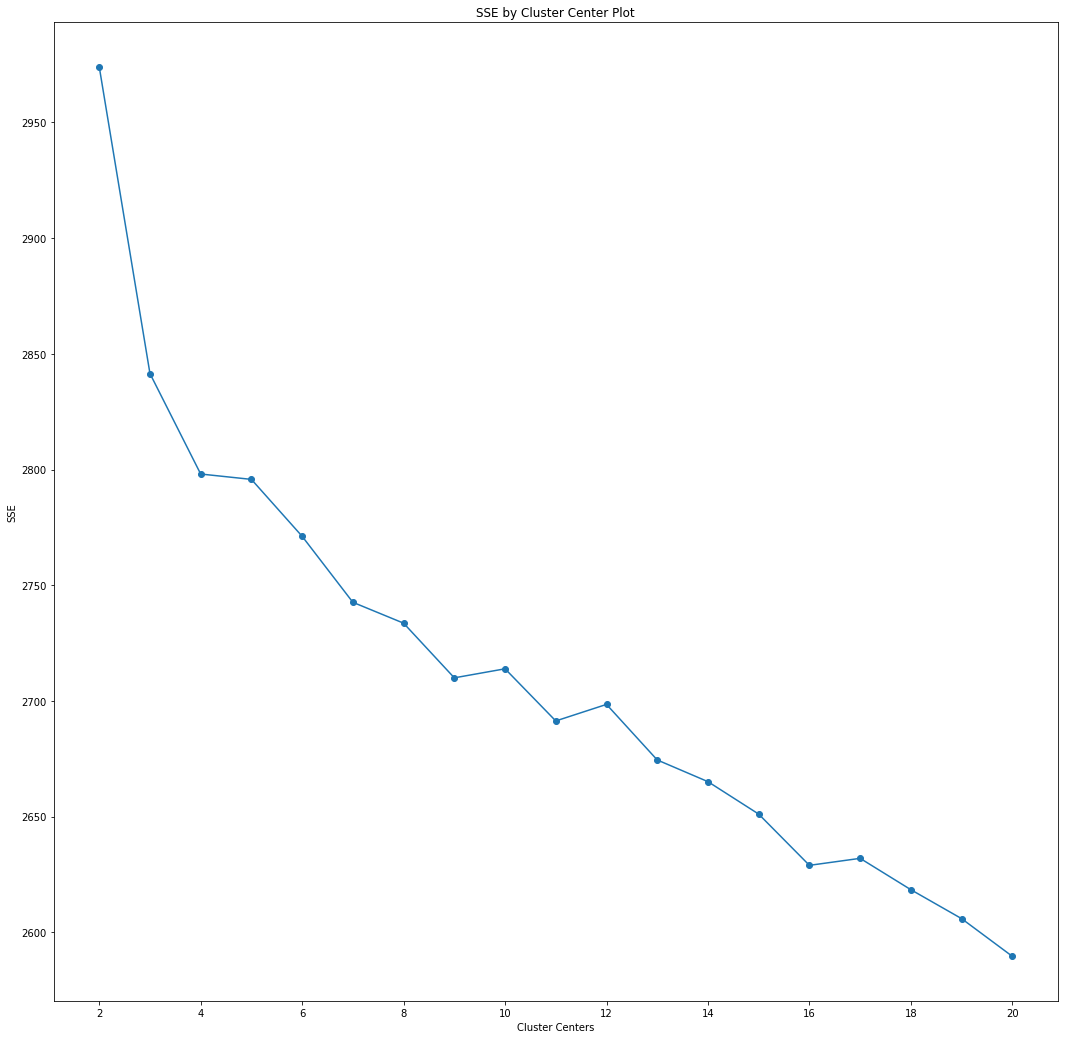

In [47]:
find_optimal_clusters_kmeans(cluster_8_tfidf, 2, 20, 19)

Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
485.4968565704416 [20]


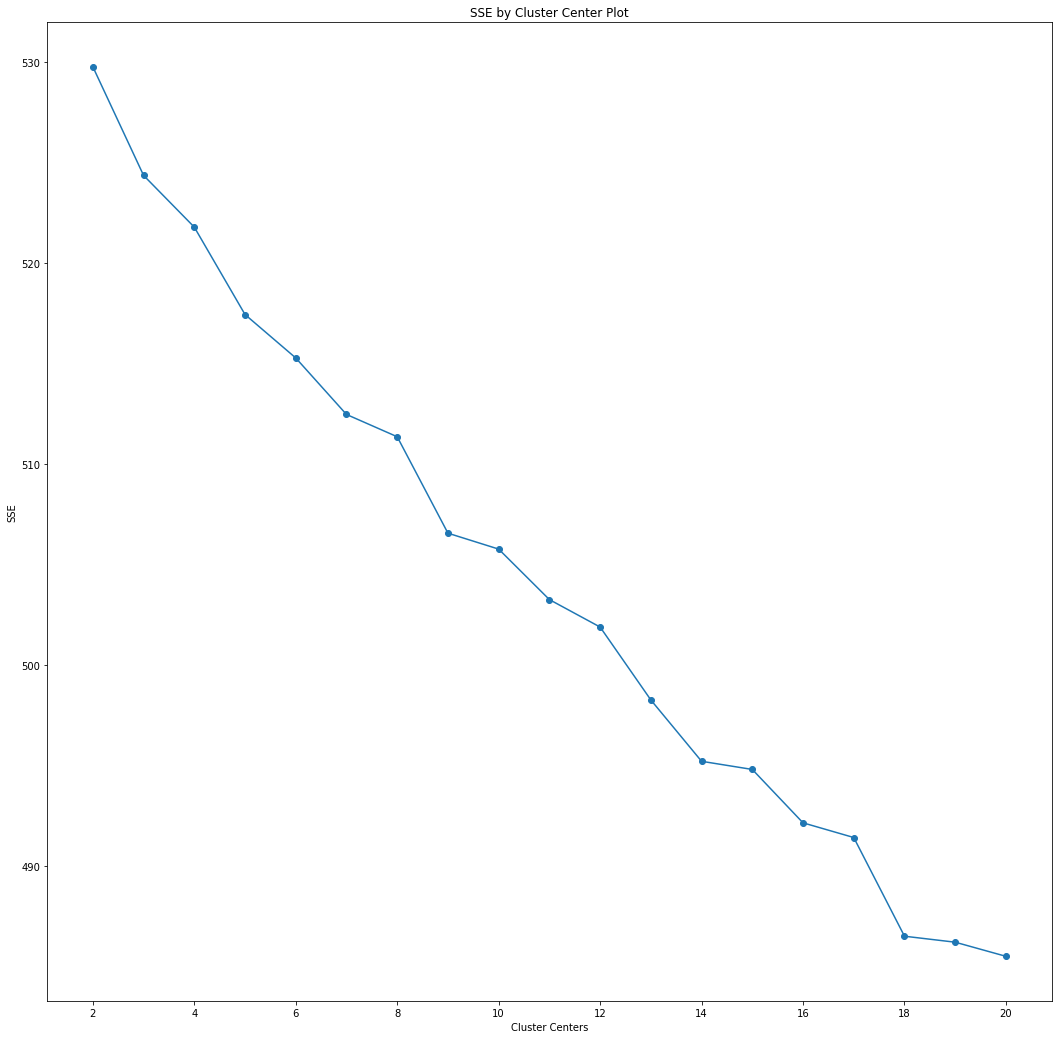

In [48]:
find_optimal_clusters_kmeans(cluster_9_tfidf, 2, 20, 19)

Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
1338.3591120322085 [20]


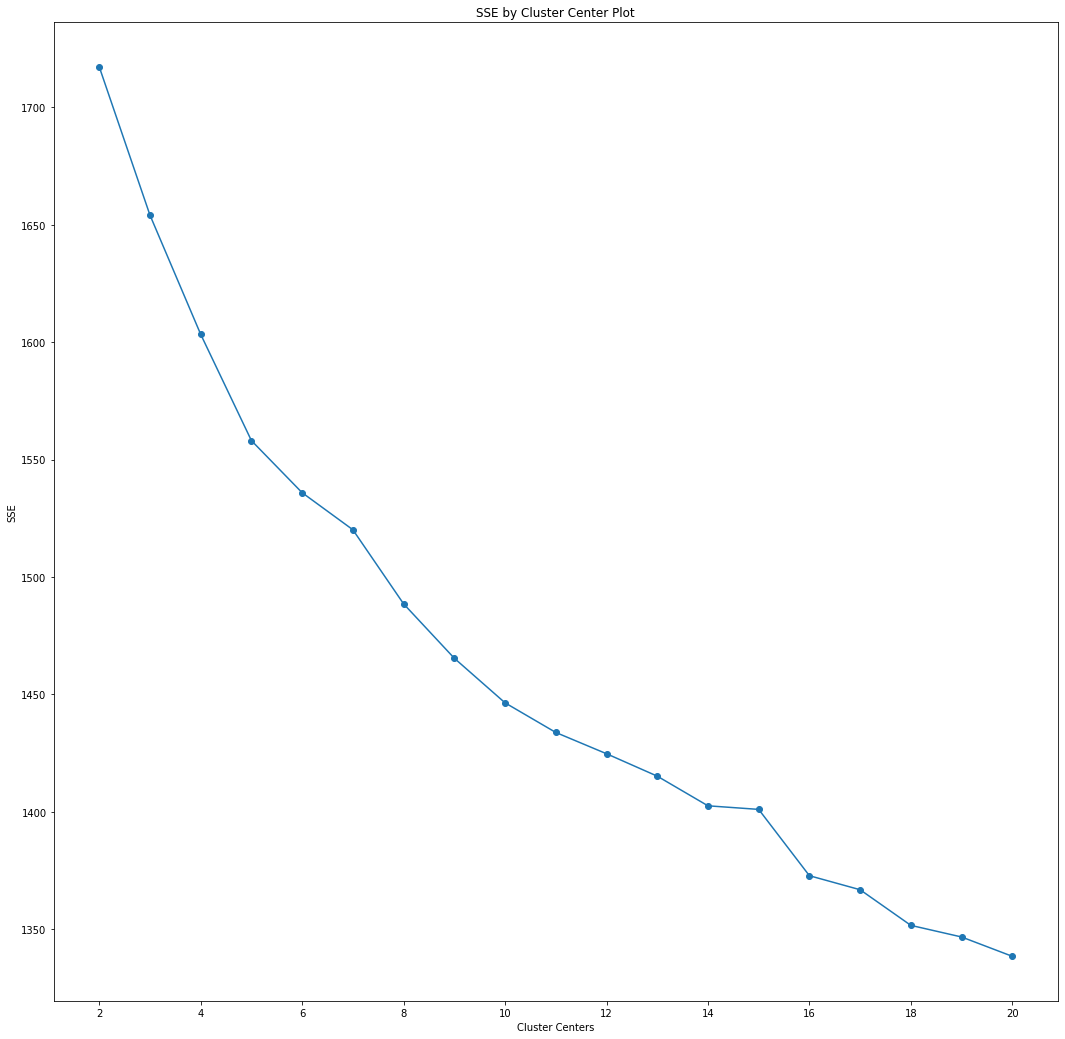

In [49]:
find_optimal_clusters_kmeans(cluster_10_tfidf, 2, 20, 19)

Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
9761.056047963859 [19]


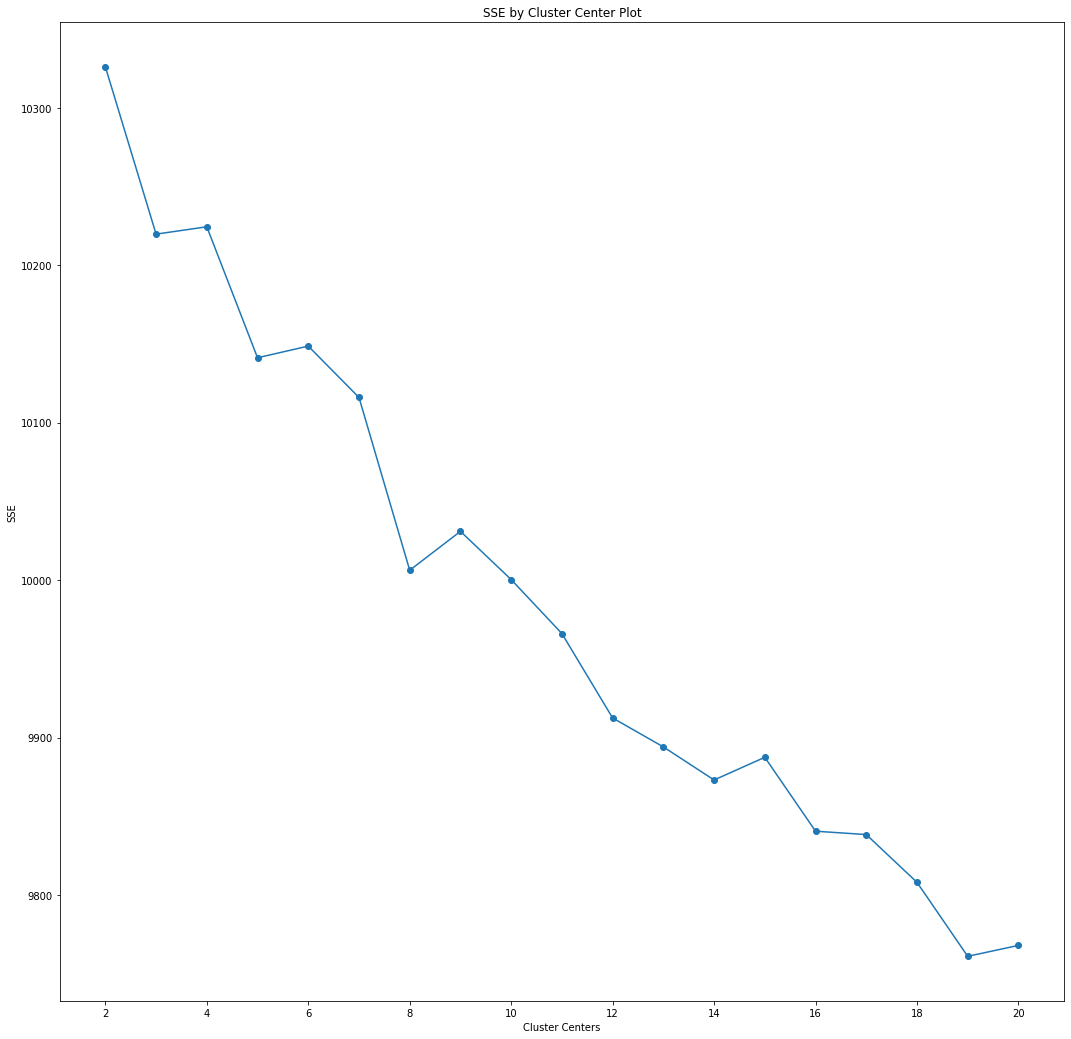

In [50]:
find_optimal_clusters_kmeans(cluster_13_tfidf, 2, 20, 19)

Okay, so we want to use 4 or 6 clusters for cluster 4, 11 clusters for cluster 6, 15 clusters for cluster 7, 4 clusters for cluster 8, 15 clusters for cluster 9, 14 clusters for cluster 10, and 8 for cluster 13.

### Optimal Number of Clusters
We will analyze the "optimal clusterings".

In [67]:
clusters_4 = cluster.KMeans(n_clusters = 6, n_init = 25, random_state = 42, max_iter = 500).fit(cluster_4_tfidf).labels_

In [70]:
clusters_6 = cluster.KMeans(n_clusters = 11, n_init = 25, random_state = 42, max_iter = 500).fit(cluster_6_tfidf).labels_

In [71]:
clusters_7 = cluster.KMeans(n_clusters = 15, n_init = 25, random_state = 42, max_iter = 500). fit(cluster_7_tfidf).labels_

In [84]:
clusters_8 = cluster.KMeans(n_clusters = 6, n_init = 25, random_state = 42, max_iter = 500). fit(cluster_8_tfidf).labels_

In [73]:
clusters_9 = cluster.KMeans(n_clusters = 15, n_init = 25, random_state = 42, max_iter = 500). fit(cluster_9_tfidf).labels_

In [74]:
clusters_10 = cluster.KMeans(n_clusters = 14, n_init = 25, random_state = 42, max_iter = 500). fit(cluster_10_tfidf).labels_

In [75]:
clusters_13 = cluster.KMeans(n_clusters = 8, n_init = 25, random_state = 42, max_iter = 500). fit(cluster_13_tfidf).labels_

### Figure out which subclusters are useful

In [85]:
cluster_4['subcluster'] = clusters_4
cluster_6['subcluster'] = clusters_6
cluster_7['subcluster'] = clusters_7
cluster_8['subcluster'] = clusters_8
cluster_9['subcluster'] = clusters_9
cluster_10['subcluster'] = clusters_10
cluster_13['subcluster'] = clusters_13

In [77]:
cluster_4

,text,cluster,subcluster
6,More info: https://t.co/HtkH9Or0b3 https://t.c...,4,5
41,https://t.co/w4CrvFS3Qv,4,1
122,https://t.co/KydHXaMTVT,4,1
240,"@anildash Corporations lie, and local governme...",4,5
293,#GiveEcoliATail https://t.co/ClsTyuH9q0,4,1
315,Letter: Water Contamination On Long Island htt...,4,3
333,@Kre8change https://t.co/7iBPlT3b7g,4,1
375,Letter: Water Contamination On Long Island htt...,4,3
405,#contamination #waterpollution https://t.co/OH...,4,5
413,Letter: Water Contamination On Long Island htt...,4,3


In [78]:
cluster_6

,text,cluster,subcluster
479,Yemeni Co for investment in oil &amp; minerals...,6,9
736,@FabulouslyIndie Does your coconut oil contain...,6,9
4004,Solomon Islands: bay hit by oil spill suffers ...,6,9
6037,âMy hair looks dryâ\n*sprays Moroccan oil*...,6,9
6186,*@ObelwaKgosigadi Bio oil / celltone oil / gen...,6,9
6841,Global Oil and Gas Pipeline Leak Detection Equ...,6,9
8326,The Trump team has been sued for groundwater c...,6,9
8551,".*@Chevron has dumped 800,000 gallons of crude...",6,8
8942,"""Oil and gas infrastructure will never be free...",6,9
9274,https://t.co/t9iroQIyzR Damping of surface wav...,6,9


In [79]:
cluster_7

,text,cluster,subcluster
9,The 20 Democrats will meet this week in a Miam...,7,6
13,Get ready for thunderstorms and flash floods t...,7,6
14,Beginning of this video shows Downtown Honolul...,7,6
17,Get ready for thunderstorms and flash floods t...,7,6
27,The enhanced risk is still in place but has sh...,7,6
28,The enhanced risk is still in place but has sh...,7,6
40,"@thehill June 25, 2019:\n\nhttps://t.co/TPGoYG...",7,6
42,FMFD has joined agencies from across the regio...,7,6
46,@HendoYankees @davidtabrown Dave once saved 30...,7,6
47,Follow the send crew down the Don Skjoli river...,7,6


In [86]:
cluster_8

,text,cluster,subcluster
149,@FLOTUS What about the #KidsInCages? What abou...,8,0
300,People in University Park still can't drink or...,8,0
344,Meeting held to address lead contamination in ...,8,0
360,Ninty percent of Flint water samples had 4 par...,8,0
363,Chicago (IL) WLS: Meeting to be held to addres...,8,0
367,Meeting to be held to address lead contaminati...,8,0
371,University Park residents will have a chance t...,8,0
425,@MichiganLCV A new and improved lead/copper ru...,8,0
426,University Park's mayor said he declared a sta...,8,0
2467,"I suggest this person use a dictionary, accomm...",8,0


In [81]:
cluster_9

,text,cluster,subcluster
284,@Ssimms777 @KeWeiss1 @MelissaFazli @GavinNewso...,9,7
2096,*@noahcicero *@DaisyFried Coal ash ponds are t...,9,8
2097,"""NC wants to find the source of water contamin...",9,11
2098,*@atrupar Making great progress?\n you're doin...,9,10
2099,"As if we needed more reasons to ditch coal, it...",9,12
2100,*@shossy2 *@RodneyClaeys W/ Obama's restrictio...,9,0
2101,NC wants to find the source of water contamina...,9,11
2102,NC wants to find the source of water contamina...,9,11
2103,Mike Pence is lying to us daily. He doesn't b...,9,8
2104,â¦â¦*@VPâ© stupid and short-sighted. Coal i...,9,10


In [82]:
cluster_10

,text,cluster,subcluster
3858,NOTE: this contamination was acute &amp delib...,10,6
8014,NOTE: this contamination was acute &amp; delib...,10,6
8204,A long season of heavy rains has researchers f...,10,8
8219,Satellite Imagery Confirms Factory Farm Growth...,10,8
8511,"âThat's your president, America.\n\nIt's got...",10,6
9405,Bloom's Mission to Turn Toxic Algae into Shoes...,10,4
9406,Algae bloom in Lake Chivero today. #ZimbabweWa...,10,6
9407,Bloom's Mission to Turn Toxic Algae into Shoes...,10,4
9408,"Hurricane Barry, Was It Manipulated In The Att...",10,6
9409,Bloom's Mission to Turn Toxic Algae into Shoes...,10,4


In [83]:
cluster_13

,text,cluster,subcluster
1167,@soodsaab08 @capbunnykiller @NetflixIndia Wate...,13,3
1523,Hereâs your regular plug to read âThe Swam...,13,1
1599,Two service providers in the #ACT rescuing foo...,13,7
1600,Yeah fun fact: This is the imbecile who - as G...,13,3
1601,OH SEHUN THANK YOU FOR SAVING THIS DROUGHT,13,7
1603,Chinese agriculture minister to head UN food a...,13,7
1606,Lots to discuss about #cawater at the 2019 Wat...,13,1
1608,"@Tshoki_Moses How's drought that side, ke batl...",13,7
1611,The pattern has been gang busters in one game ...,13,7
1612,I got a new plug it ainât a drought no more ...,13,1


In [89]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        
        
get_top_keywords(cluster_4_tfidf, clusters_4, vectorizer.get_feature_names(), 15)


Cluster 0
waterislife,watersolutions,cleanwaterforall,waterquality,accessiblewater,watersystems,waterequipment,chemrock,mactanrock,waterrific,watersupply,drinkingwater,watertechnology,waterprovider,waterservices

Cluster 1
foolhardy,httptcoaxclkupl…,weakest,contender,loathe,burnham,laborista,slashed,aloud,years,html,donations,14,contd,https

Cluster 2
smartnews,fun,climatechangeisreal,environment,don,huffpost,https,sand,sun,sewage,report,shows,beaches,unsafe,swimming

Cluster 3
slashed,charisma,influx,thrones,weakest,warning,coli,addressing,beach,https,water,island,letter,long,contamination

Cluster 4
depends,ve,kidding,said,watermanagement,sewage,ia,persons,imagine,dog,cat,management,https,water,drinking

Cluster 5
waste,a1,coli,ecosearch,web,environment,pollution,ecoli,news,management,wastewater,flashflood,waterpollution,water,https


In [90]:
get_top_keywords(cluster_6_tfidf, clusters_6, vectorizer.get_feature_names(), 15)


Cluster 0
spill,island,pristine,oil,remote,liters,https,000,litres,diesel,spilled,sea,patagonia,chile,40

Cluster 1
country,spill,oil,locals,brings,anger,https,biggest,decades,defiance,chevron,canyon,ordered,halt,california

Cluster 2
owned,launch,harming,demanding,500,disastrous,write,sunken,administrator,wheeler,gulf,mexico,epa,energy,taylor

Cluster 3
nlpoli,canada,cdnpoli,https,oil,news,000,cbc,spilled,rig,ocean,12,newfoundland,causing,shutdown

Cluster 4
plugging,oil,spill,news,coast,patagonian,reported,navy,southern,island,investigating,https,remote,says,chilean

Cluster 5
atlanta,treated,university,evacuated,clark,place,shelter,east,rutherford,like,cause,style,https,spill,chemical

Cluster 6
action,graves,ecowatch,oil,spill,https,pristine,hit,care2,dead,larger,indonesian,ravages,paris,island

Cluster 7
litre,suspends,cbc,12,spill,oil,news,newfoundland,https,halts,canada,shut,production,platform,hibernia

Cluster 8
dumps,nearly,crude,oil,https,california,county,kern,spills,canyo

In [91]:
get_top_keywords(cluster_7_tfidf, clusters_7, vectorizer.get_feature_names(), 15)


Cluster 0
75,flexible,hybrid,giraffe,x3,water,https,drinking,safe,heavy,garden,duty,lightweight,hose,flexzilla

Cluster 1
going,having,eating,management,ve,amp,good,today,gallon,like,drink,https,water,drinking,day

Cluster 2
skin,cars,houses,businesses,clothes,public,going,sheets,spill,chemical,nh,2013,nashua,world,went

Cluster 3
conservation,better,poor,emergency,project,sustainable,flood,resource,waste,india,resources,amp,https,water,management

Cluster 4
lead,military,50,revealed,london,locations,fountains,amp,york,contamination,drinking,management,water,https,new

Cluster 5
bacteria,sites,today,enquirer,ohio,58,usa,water,https,usatoday,list,beaches,america,poop,dirtiest

Cluster 6
beach,clean,flood,people,like,amp,flashflood,waste,pipe,leak,ecoli,sewage,sanitation,water,https

Cluster 7
city,ordered,contamination,levels,boil,flour,recalled,cdc,la,ground,linked,outbreak,bison,https,coli

Cluster 8
migrant,reports,kids,300,caring,remote,station,patrol,detained,inadequate,texas,sani

In [93]:
get_top_keywords(cluster_8_tfidf, clusters_8, vectorizer.get_feature_names(), 15)


Cluster 0
new,contamination,amp,make,people,like,pipes,levels,flint,drink,drinking,horse,https,lead,water

Cluster 1
old,want,thirsty,ita,https,force,saying,think,em,lead,water,cana,horse,drink,make

Cluster 2
laborista,amidst,michigan,problems,crazy,post,washington,lead,https,flint,state,blood,emergency,mich,declared

Cluster 3
problem,potus,ya,say,think,ita,force,em,https,cana,lead,water,drink,make,horse

Cluster 4
just,mad,didnt,marcorubio,das,2a,sumn,yu,thats,ya,sum,lead,water,cana,bring

Cluster 5
dioxide,speed,circumstances,naturally,occurring,study,researchers,toa,lead,water,https,maybe,lots,blame,manganese


In [94]:
get_top_keywords(cluster_9_tfidf, clusters_9, vectorizer.get_feature_names(), 15)


Cluster 0
poison,mercury,states,realdonaldtrump,people,epa,toxic,air,gop,https,vote,ash,coal,water,amp

Cluster 1
insideclimate,coalash,inside,news,coal,ash,https,trump,epa,rules,use,sites,construction,proposes,weaker

Cluster 2
country,streams,climatechange,poor,contamination,gop,guess,wea,ve,https,stop,ita,ash,coal,water

Cluster 3
advocates,ash,deq,coal,county,site,investigation,orders,chatham,ohio,river,https,contamination,ponds,groundwater

Cluster 4
humans,ash,tribune,chicago,https,coal,pollution,groundwater,rules,plant,illinois,polluted,board,waukegan,lakefront

Cluster 5
coal,lifting,epa,health,proposed,filled,supply,burning,leach,hazardous,left,residue,problems,cause,substances

Cluster 6
streams,better,toxic,waste,good,does,allowing,companies,make,drink,ash,coal,foxandfriends,realdonaldtrump,water

Cluster 7
food,coal,removing,causes,stopped,wake,friend,concern,rich,real,polluting,america,industry,needs,cancer

Cluster 8
dump,dumped,air,protect,rivers,pollution,toxic,drinkin

In [95]:
get_top_keywords(cluster_10_tfidf, clusters_10, vectorizer.get_feature_names(), 15)


Cluster 0
gulf,mexico,fare,quartz,affect,bloom,algae,good,https,worse,make,bad,barry,storm,tropical

Cluster 1
skiing,pennington,warns,coos,beaches,state,algae,bloom,mercer,possible,https,county,lake,toxic,closes

Cluster 2
new,times,york,nyt,anne,barnard,algae,bloom,https,lake,largest,broader,crisis,indicating,fouls

Cluster 3
loathe,nasa,effects,man,geoengineering,lakeerie,algae,bloom,https,lake,toxic,erie,green,turning,expands

Cluster 4
news,climatechange,habs,automated,founders,algae,bloom,online,outside,https,toxic,outsidemagazine,turn,mission,shoes

Cluster 5
blue,green,smithfield,toxic,algae,bloom,https,responsible,death,kills,vermont,puppy,private,dog,pond

Cluster 6
mississippi,officials,state,swimming,harmful,gulf,advisory,blue,toxic,green,water,lake,bloom,https,algae

Cluster 7
forces,blue,bans,swimming,bloom,coast,algae,close,21,toxic,https,gulf,closed,beaches,mississippi

Cluster 8
predicted,forecast,western,seen,rapidly,expanding,expected,summer,imagery,bloom,algae,http

In [96]:
get_top_keywords(cluster_13_tfidf, clusters_13, vectorizer.get_feature_names(), 15)


Cluster 0
kno,trap,rich,album,got,colossal,purple,future,talk,stick,1future,genius,drought,https,thought

Cluster 1
australia,chennai,change,india,2019,france,sudan,million,climatechange,south,climate,love,water,drought,https

Cluster 2
ramsey,foolhardy,weakest,contender,loathe,burnham,laborista,slashed,charisma,influx,httptcoaxclkupl…,coming,survive,https,drought

Cluster 3
thunderstorm,farmers,year,pray,day,disappointing,weather,useless,forecast,blessed,like,https,drought,waiting,rain

Cluster 4
selca,years,end,ended,taekook,https,people,like,ya,good,drought,games,playing,loyalty,finally

Cluster 5
environment,watch,water,watershortage,india,chennaiwatercrisis,youtube,drought,news,bbc,https,chennai,city,space,visible

Cluster 6
tsunami,andaman,cyclone,gujarat,islands,ladakh,nicobar,volunteers,earthquake,leh,gave,aa,1a,rajasthan,mishaps

Cluster 7
going,com,real,climate,long,water,years,end,ia,amp,http,like,year,https,drought


### Relevant List:
__Using my best judgment from the most common keywords for each subcluster, these are the cluster-subcluster that contain relevant tweets. If we start picking up irrelevant stuff, this is where we will hope our active learning strategy will take over.__

Cluster 4; Subcluster 2

Cluster 6; Subclusters 0, 1, 3, 4, 7, 8, 9

Cluster 7; Subclusters 5, 6, 12 

Cluster 8; Subclusters 5

Cluster 9; Subclusters 3, 4, 14

Cluster 10; Subclusters 0, 1, 3, 5, 6, 7, 8, 10, 11, 12

Cluster 13; Subclusters 1, 5, 6

In [104]:
relevant_tweets = pd.concat([cluster_4[cluster_4.subcluster == 2], cluster_6[cluster_6.subcluster == 0],
                            cluster_6[cluster_6.subcluster == 1], cluster_6[cluster_6.subcluster == 3],
                            cluster_6[cluster_6.subcluster == 4], cluster_6[cluster_6.subcluster == 7],
                            cluster_6[cluster_6.subcluster == 8], cluster_6[cluster_6.subcluster == 9],
                            cluster_7[cluster_7.subcluster == 5], cluster_7[cluster_7.subcluster == 6],
                            cluster_7[cluster_7.subcluster == 12], cluster_8[cluster_8.subcluster == 5],
                            cluster_9[cluster_9.subcluster == 3], cluster_9[cluster_9.subcluster == 4],
                            cluster_9[cluster_9.subcluster == 14], cluster_10[cluster_10.subcluster == 0],
                            cluster_10[cluster_10.subcluster == 1], cluster_10[cluster_10.subcluster == 3],
                            cluster_10[cluster_10.subcluster == 5], cluster_10[cluster_10.subcluster == 6],
                            cluster_10[cluster_10.subcluster == 7], cluster_10[cluster_10.subcluster == 8],
                            cluster_10[cluster_10.subcluster == 10], cluster_10[cluster_10.subcluster == 11],
                            cluster_10[cluster_10.subcluster == 12], cluster_13[cluster_13.subcluster == 1],
                            cluster_13[cluster_13.subcluster == 5], cluster_13[cluster_13.subcluster == 6]])
relevant_tweets.drop_duplicates(subset = ['text'], keep = 'first').reset_index()
print(len(relevant_tweets))
relevant_tweets.head()

25502


,text,cluster,subcluster
3547,"Sun, Sand And Sewage: Report Shows Many U.S. B...",4,2
3548,"Many U.S. Beaches Are Unsafe For Swimming, Rep...",4,2
3551,"Many U.S. Beaches Are Unsafe For Swimming, Rep...",4,2
3554,"Sun, Sand And Sewage: Report Shows Many U.S. B...",4,2
3561,"Sun, Sand And Sewage: Report Shows Many U.S. B...",4,2


In [107]:
from pandas import HDFStore
relevant_tweets.to_hdf('relevant_tweets.h5', key = 'relevant_tweets')